<a href="https://colab.research.google.com/github/pedr19faria/pend-duplo/blob/main/P%C3%AAndulo_Duplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pêndulo Duplo**
---



**Aluno**: Pedro Faria Albuquerque \\
**Matrícula**: 2022039658

Primeiro, importa-se as bibliotecas e os módulos que serão usadas para desenvolver o projeto;

In [87]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scipy.integrate as si

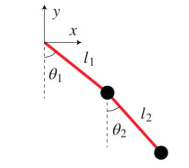

 O movimento do Pêndulo Duplo pode ser descrito por quatro equações diferenciais. Assim ao resolver cada uma delas se descobrirá $\theta _1$, $\theta _2$, $ω _1$ e $\omega _ 2$.

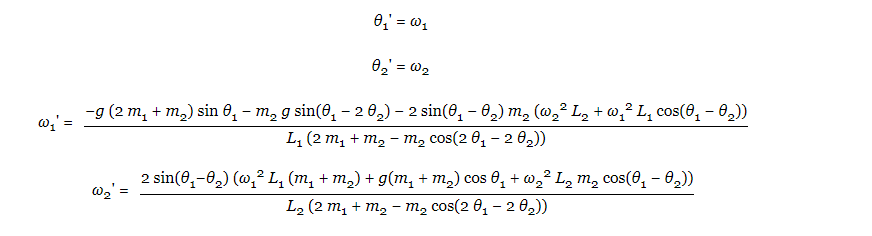

Desenvolve-se uma função que recebe os valores iniciais, tempo e informações sobre o problema - massa, comprimento do fio e gravidade - que se retorna os valores das equações diferenciais apresentadas acima. 

In [88]:
   
def pendulo_duplo(u,t,m1,m2,l1,l2,g):
  uprime = np.zeros_like(u)
  uprime[0] = u[1] 

  uprime[1]= (-g*(2*m1 + m2)*np.sin(u[0]) - m2*g*np.sin(u[0] - 2*u[2]) - 2*np.sin(u[0] - u[2])*m2*((u[3]**2)*l2 + (u[1]**2)*l1*np.cos(u[0] - u[2])))/(l1*(2*m1+m2 - m2*np.cos(2*u[0] - 2*u[2])))

  uprime[2] = u[3]

  uprime[3] = (2*np.sin(u[0] - u[2])*((u[1]**2)*l1*(m1 + m2) + g*(m1 + m2)*np.cos(u[0]) + (u[3]**2)*l2*m2*np.cos(u[0] - u[2])))/(l2*(2*m1 + m2 - m2*np.cos(2*u[0] - 2*u[2])))

  return uprime ## Vetor com as 4 derivadas que precisamos resolver, que no caso são (theta1)', (w1)', (theta2)', (w2)'

Função usada para receber a função e as informações do problema e resolver as equalçoes diferenciais, usando o módulo scipy.odeint() da biblioteca scipy.


A função odeint.integrate usada na célula a seguir integra um sistema de equações diferenciais ordinárias, possibilitando a resolução desse sistema. É necessário passar a ela a função que representa o sistema de equações, as condições iniciais das váriaveis que desejamos descobrir e argumentos adicionais usados na função.

In [89]:
def resposta(f, n, t, theta1,theta2,  l1=1.,l2 = 1., m1 = 3., m2 = 3.):
  u = np.zeros((4))
  w1 = 0.
  w2 = 0.
  
  g=9.8
  u[0] = theta1
  u[1] = w1
  u[2] = theta2
  u[3] = w2
  resposta = si.odeint(f, y0 = [theta1, w1, theta2, w2], t=t, args = (m1,m2,l1,l2,g))  ### Função, retorna matriz com os resultados [theta de 1, velocidade de 1, theta de 2 e velocidade de 2]
  return resposta  ### Devolve os valores da matriz, e o correspondente para os ângulos e velocidades (colunas da matriz transposta)
def graph(resposta, t): 
  ### Função desenvolve os gráficos usando o matplotlib
  theta1 = resposta.T[0]
  w1 = resposta.T[1]
  theta2 = resposta.T[2]
  w2 = resposta.T[3]  
  fig, ax = plt.subplots(1,2, figsize = (16,4))
  ax[0].plot(t,theta1)
  ax[0].set_xlabel('Tempo (s)')
  ax[0].set_ylabel('Theta 1 (radianos)')
  ax[0].set_title(f'Inicial: {theta1[0]:.3f} radianos')

  ax[1].plot(t,theta2)
  ax[1].set_xlabel('Tempo (s)')
  ax[1].set_ylabel('Theta 2 (radianos)')
  ax[1].set_title(f'Inicial: {theta2[0]:.3f} radianos')


A função a seguir desempenha o papel de desenvolver a animação do movimento do pêndulo duplo. Utiliza-se a função animation e pillow writer do matplotlib para representar os gráficos.

In [90]:
def gif(resposta, resposta2, t, n_passos, l1 = 1., l2 = 1., a=0):
  theta1 = resposta.T[0]
  w1 = resposta.T[1]
  theta2 = resposta.T[2]
  w2 = resposta.T[3]  

  theta11 = resposta2.T[0]
  w11 = resposta2.T[1]
  theta22 = resposta2.T[2]
  w22 = resposta2.T[3] 

  def pos(theta1, theta2):
    x1 = -l1*np.sin(theta1)
    y1 = -l1*np.cos(theta1)
    x2 = -l2*np.sin(theta2) + x1 
    y2 = -l2*np.cos(theta2)  + y1
    return x1,y1,x2,y2
  
  x1,y1,x2,y2 = pos(theta1,theta2)
  x11,y11,x22,y22 = pos(theta11,theta22)


  def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    ln2.set_data([0, x11[i], x22[i]], [0, y11[i], y22[i]])



  fig, ax = plt.subplots(1,1, figsize = (8,8))
  ax.get_xaxis().set_ticks([])
  ax.get_yaxis().set_ticks([])
  ax.set_xlim(-4,4)
  ax.set_ylim(-5,5)
  ax.set_title(f'Pêndulo Duplo')
  

  ln1, = plt.plot([],[], 'yo--',lw=2, markersize = 8 ) ## Aqui o plot é feito com os valores pegados na função animate
  ln2, = plt.plot([],[], 'co--',lw=2, markersize = 8 )

  ani = animation.FuncAnimation(fig, animate, frames = n_passos, interval  = 50)
  ### A função .FuncAnimation itera a função dada -animate- e cria a figura com isso, os frames são decididos a partir dos pontos que pegamos 
  ani.save(f'pendulo_duplo_{a}.gif', writer = 'pillow', fps = (12))
  ### Aqui salva a animação em um gif que está anexado no envio da atividade

Novamente utilizamos a funcionalidade do matplotlib que possibilita a criação de animações para desenvolver gráfico de $θ_1$ por $\theta_2$.

In [91]:
def thetas(resposta, t, n_passos, a = 0):
  theta1 = resposta.T[0]
  theta2 = resposta.T[2]
  x =[]
  y = []
  fig, ax = plt.subplots(1,1, figsize = (8,8))
  plt.xlabel("Theta 1")
  plt.ylabel('Theta 2')
  def animate(i):
    x.append(theta1[i])
    y.append(theta2[i])
    plt.plot(x,y, c = 'r')
    
  ani = animation.FuncAnimation(fig, animate, frames = n_passos, interval  = 50) 
  ani.save(f'gif_angulos_{a}.gif', writer = 'pillow', fps = (12))

A partir deste ponto apenas chamaremos as funções, desenvolvendo os gráficos e animações desejadas: \\
Para todas as representações iremos usar dois pêndulos com diferença pequenas entre $\theta_1$ e $\theta_2$. 

In [92]:
n_passos = 300
t = np.linspace(0.,30., n_passos)

### Ângulos com pequanas diferenças entre eles para ver como há sensibilidade das condições iniciais

theta1 = np.radians(120.)  
theta2 = np.radians(120.)
theta11 = np.radians(120.1)
theta22 = np.radians(120.1)

theta3 = np.radians(20.) 
theta4 = np.radians(20.)
theta33 = np.radians(21.)
theta44 = np.radians(21.)



In [93]:
resposta1  = resposta(pendulo_duplo, n_passos, t, theta1,theta2, l2 = 1.)
resposta2 = resposta(pendulo_duplo, n_passos, t, theta11,theta22, l2 = 1.)

resposta3 = resposta(pendulo_duplo, n_passos, t, theta3,theta4)
resposta4 = resposta(pendulo_duplo, n_passos, t, theta33,theta44)


Usaremos os seguintes ângulos para construir os Pêndulos Duplos:
\
$\theta_1 = \theta_2 = 120^{\circ}$ \
 e o outro pêndulo duplo com:\
 $\theta_{1} = \theta_{2} = 120,1^{\circ}$ \\

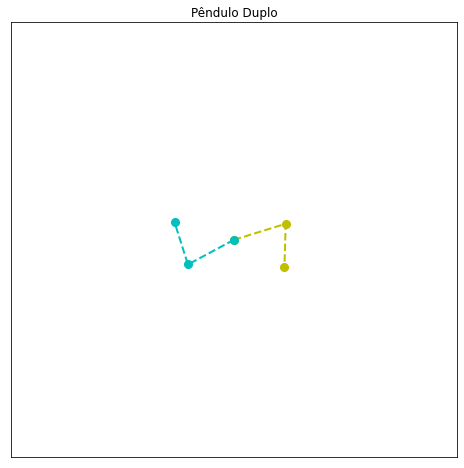

In [94]:
gif(resposta1, resposta2,  t, n_passos)

$\theta_1 = 120^{\circ}$ e $\theta_2 = 120^{\circ}$

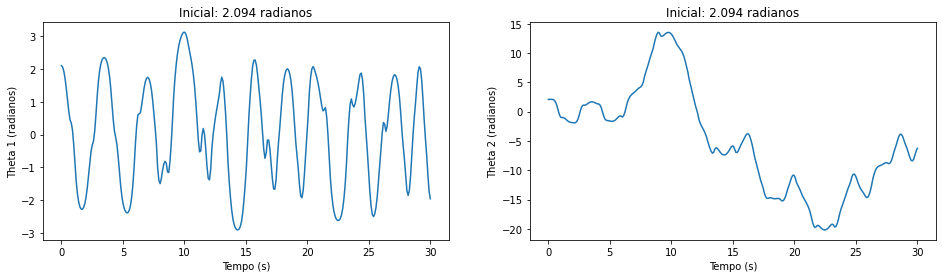

In [95]:
### Gráfico e animação com 120 e 120.1
graph(resposta1, t)

$\theta_1 = 120,11^{\circ}$ e $\theta_2 = 120,1^{\circ}$

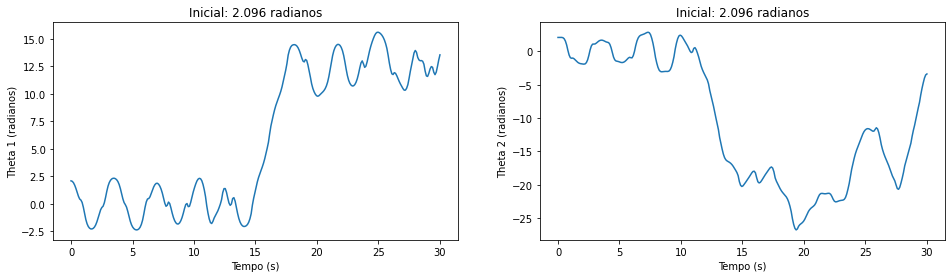

In [96]:
graph(resposta2, t)

Utilizando ângulos maiores percebemos que o sistema apresenta grande sensibilidade às condições iniciais, sendo assim um sistema caótico. Ao visualizarmos a animação isso se torna ainda mais perceptível, uma vez que os pêndulos iniciam seu movimento juntos e rapidamente se tornam completamente imprevisíveis.

Usando um gráfico de $\theta_1$ por $\theta_2$ isso a imprevisibilidade presente nesse sistema também é bem representado. Não há periodicidade nenhuma entre os dois ângulos

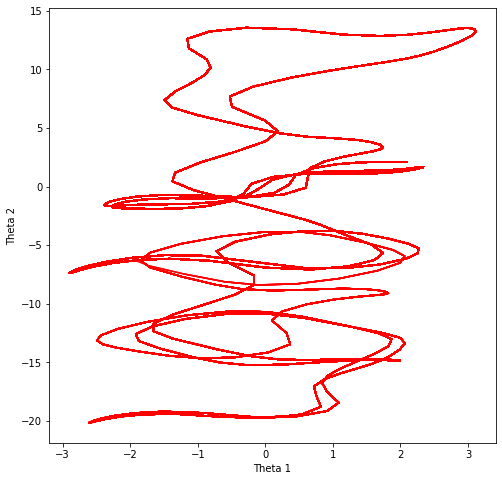

In [49]:
thetas(resposta1, t, n_passos)

Agora com: \\
$\theta_1 = \theta_2 = 20^{\circ}$ \
 e o outro pêndulo duplo com:\
 $\theta_{1} = \theta_{2} = 21^{\circ}$ \\



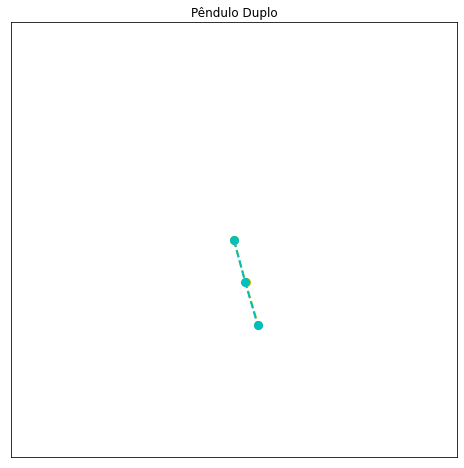

In [54]:
gif(resposta3, resposta4, t,n_passos, a = 1)

$\theta_1 = 20^{\circ}$ e $\theta_{2} = 20 ^{\circ}$ \\

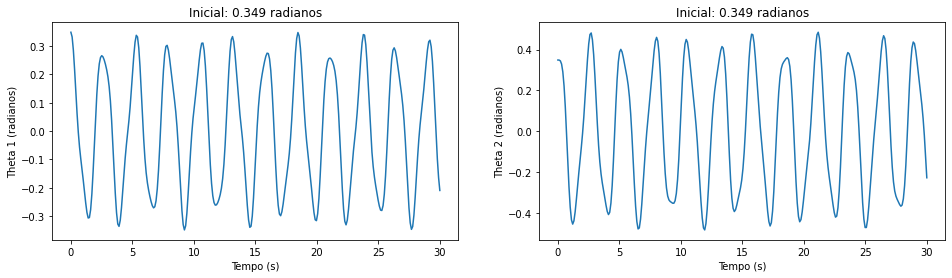

In [85]:
graph(resposta3, t)

$\theta_1 = 21^{\circ}$ e $\theta_{2} = 21 ^{\circ}$ \\

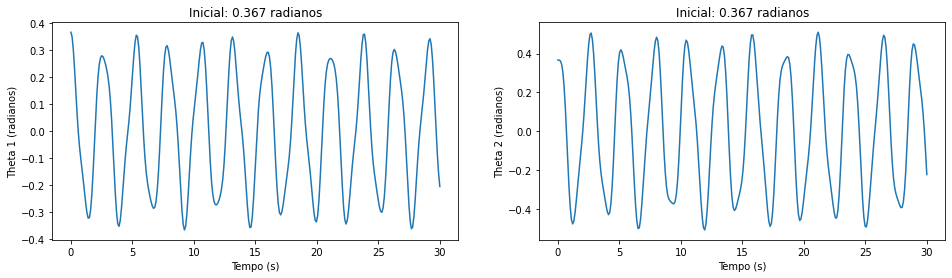

In [86]:
graph(resposta4, t)

Percebe-se que em ângulos menores o sistema não apresenta um comportamento caótico e a partir desses gráficos percebe-se certa periodicidade.

Animação a seguir do gráfico de $\theta_1 = 20 ^{\circ}$ e $\theta_1 = 20 ^{\circ}$

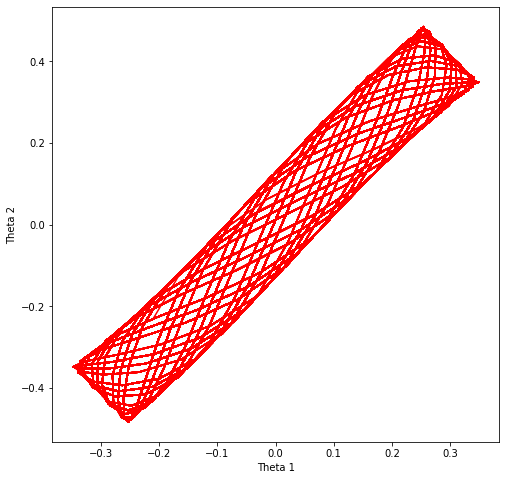

In [55]:
thetas(resposta3, t, n_passos, a = 1)

Tanto a animação dos pêndulos, quanto a de $\theta_1$ por $\theta_2$ mostra que há periodicidade nesse movimento. Percebe-se que entre os ângulos o movimento também não é mais imprevisível.